In [2]:
import numpy as np
from scipy import sparse
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm

**Problema 1:** 

Resuelve numéricamente la ecuación de reacción-difusión para el caso de condiciones de frontera tipo Dirichlet por el método de BTCS, con condición inicial $u(x,0)=0$, y condiciones a la frontera $u(0,t)=1$ y $u(1,t)=2$, para un tiempo $t=0,..,1$.

Muestra una gráfica de la evolución temporal de la reacción difusión de los compuestos.



True


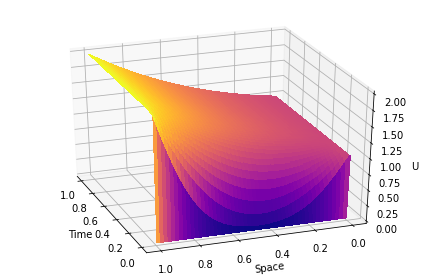

In [30]:


M = 50*5 
N = 60*5 

x0 = 0
xL = 1


dx = (xL - x0)/(M - 1)

t0 = 0
tF = 1


dt = (tF - t0)/(N - 1)

D = 1  
alpha = -1 

r = dt*D/dx**2
s = dt*alpha;

xspan = np.linspace(x0, xL, M)
tspan = np.linspace(t0, tF, N)

main_diag = (1 + 2*r - s)*np.ones((1,M-2))
off_diag = -r*np.ones((1, M-3))

a = main_diag.shape[1]

diagonals = [main_diag, off_diag, off_diag]

A = sparse.diags(diagonals, [0,-1,1], shape=(a,a)).toarray()


U = np.zeros((M, N))



U[:,0] = 0.0



U[0,:] = 1.0 
U[-1,:] = 2.0 

for k in range(1, N):
    c = np.zeros((M-4,1)).ravel()
    b1 = np.asarray([r*U[0,k], r*U[-1,k]])
    b1 = np.insert(b1, 1, c)
    b2 = np.array(U[1:M-1, k-1])
    b = b1 + b2  # Right hand side
    U[1:M-1, k] = np.linalg.solve(A,b)  


g = np.allclose(np.dot(A,U[1:M-1,N-1]), b)
print(g)


X, T = np.meshgrid(tspan, xspan)

fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(X, T, U, linewidth=0,
                       cmap=cm.plasma, antialiased=False)

ax.set_xlabel('Time')
ax.set_ylabel('Space')
ax.set_zlabel('U')
ax.view_init(30, -200)


plt.tight_layout()
plt.show()

**Comentario** \\

En los dos extremos del tubo se observa que se mantiene una concentracion de 2 o 1, ademas como U es la concentracion del compuesto quimico, se observa que el tubo rapidamente se llena de la concentracion y con el tiempo logra el equilibrio de la concentracion a la mitad del tuvo

**Problema 2:**

Ahora supondremos que se colocan reguladores de presión, que permiten flujo de los gases desde los reservorios hacia el tubo inicialmente vacío $u(x,0) = 0$. En $x=0$, el flujo de gas es $\partial u/\partial x (0,t) = 0.1$  y en $x=1$ el flujo $\partial u/\partial x (1,t) = 0.2$.

Se pide realizar una simulación numérica de este escenario para $=0,..,10$.


True


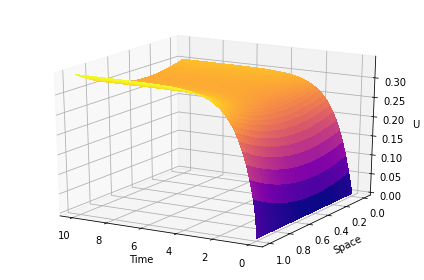

In [20]:


M = 50*5 
N = 60*5 

x0 = 0
xL = 1


dx = (xL - x0)/(M - 1)

t0 = 0
tF = 10


dt = (tF - t0)/(N - 1)

D = 1  
alpha = -1 

r = dt*D/dx**2
s = dt*alpha
a = 1 + 2*r - s


xspan = np.linspace(x0, xL, M)
tspan = np.linspace(t0, tF, N)

main_diag = (1 + 2*r - s)*np.ones((1,M))
off_diag = -r*np.ones((1, M-1))

a = main_diag.shape[1]

diagonals = [main_diag, off_diag, off_diag]

A = sparse.diags(diagonals, [0,-1,1], shape=(a,a)).toarray()
A[0,1] = -2*r
A[M-1,M-2] = -2*r


U = np.zeros((M, N))


U[:,0] = 0.0 



f = 0.1*np.ones([N +1,1])
g = 0.2 *np.ones([N+1,1])

for k in range(1, N):
    c = np.zeros((M-2,1)).ravel()
    b1 = np.asarray([2*r*dx*f[k], 2*r*dx*g[k]])
    b1 = np.insert(b1, 1, c)
    b2 = np.array(U[0:M, k-1])
    b = b1 + b2  
    U[0:M, k] = np.linalg.solve(A,b)  


gc = np.allclose(np.dot(A,U[0:M,N-1]), b)
print(gc)


X, T = np.meshgrid(tspan, xspan)

fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(X, T, U, linewidth=0,
                      cmap=cm.plasma, antialiased=False)

ax.set_xlabel('Time')
ax.set_ylabel('Space')
ax.set_zlabel('U')

ax.view_init(20, 120)

plt.tight_layout()
plt.show()

**Comentarios** \\
En este caso el tubo tambien empieza a llenarse aunque tiende a que en un lado se llene mas rapidamente, pero con el tiempo en general logra tambien el equilibrio alrededor de los 5 segundos

**Problema 3:**

¿Que pasaría en el caso de que se mezclaran dos gases que no reaccionan entre si, como sería mezclar dos recipientes con el  mismo tipo de gas (el coeficiente de reacción $\alpha=0$)?.

Suponga que inicialmente el tubo está vacío $u(x,0)=0$ y la concentración en $u(0,t)=1$ y $u(1,t)=2$.

Resuelva numéricamente este caso. 

True


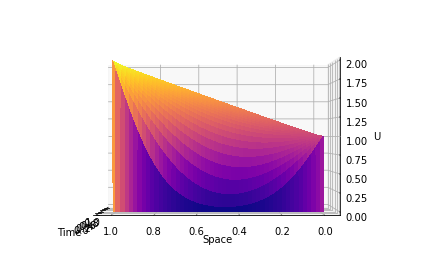

In [32]:



M = 50*5 
N = 60*5

x0 = 0
xL = 1


dx = (xL - x0)/(M - 1)

t0 = 0
tF = 1


dt = (tF - t0)/(N - 1)

D = 1  
alpha = 0 

r = dt*D/dx**2
s = dt*alpha;

xspan = np.linspace(x0, xL, M)
tspan = np.linspace(t0, tF, N)

main_diag = (1 + 2*r - s)*np.ones((1,M-2))
off_diag = -r*np.ones((1, M-3))

a = main_diag.shape[1]

diagonals = [main_diag, off_diag, off_diag]

A = sparse.diags(diagonals, [0,-1,1], shape=(a,a)).toarray()



U = np.zeros((M, N))

U[0,:] = 1.0 
U[:,0] = 0.0

U[-1,:] = 2.0 


for k in range(1, N):
    c = np.zeros((M-4,1)).ravel()
    b1 = np.asarray([r*U[0,k], r*U[-1,k]])
    b1 = np.insert(b1, 1, c)
    b2 = np.array(U[1:M-1, k-1])
    b = b1 + b2  
    U[1:M-1, k] = np.linalg.solve(A,b)  


g = np.allclose(np.dot(A,U[1:M-1,N-1]), b)
print(g)


X, T = np.meshgrid(tspan, xspan)

fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(X, T, U, linewidth=0,
                       cmap=cm.plasma, antialiased=False)

ax.set_xlabel('Time')
ax.set_ylabel('Space')
ax.set_zlabel('U')
ax.view_init(0, 180)
plt.tight_layout()
plt.show()

***Comentarios del resultado obtenido***:

La grafica obtenido es muy parecida a la del problema 1, pero si la rotamos adecuadamente se observa que el equilibrio en la concentracion que se logra es muy lineal lo que indica que lo logra mucho mas rapido en comparacion a la primera